1.1.1
0.9.6


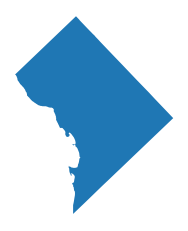

In [61]:
import folium
import openrouteservice as ors

%matplotlib inline

import matplotlib.pyplot as plt
import geopandas as gpd
import pysal as ps


import pandas as pd
import osmnx as ox
city = ox.geocode_to_gdf('Washington, D.C.')
ax = ox.project_gdf(city).plot()
_ = ax.axis('off')


import geopandas as gpd
from shapely.geometry import Point, Polygon
import pandas as pd

import networkx as nx

import igraph as ig
print(ox.__version__)
print(ig.__version__)

weight = "length"


import numpy
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform 


In [62]:

from geopy import distance
import requests
import json
import datetime
import math
import itertools


import plotly.graph_objects as go
from pulp import *
import seaborn as sn
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp
import random

In [63]:
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
my_map = gpd.read_file('Snow_Removal_Areas.kml', driver='KML')
my_map

,Name,Description,geometry
0,,,"POLYGON ((-77.00884 38.95484, -77.00866 38.954..."
1,,,"POLYGON ((-76.98949 38.94730, -76.98932 38.947..."
2,,,"POLYGON ((-77.00868 38.94796, -77.00870 38.948..."
3,,,"POLYGON ((-77.00595 38.95549, -77.00611 38.955..."
4,,,"POLYGON ((-76.98145 38.94078, -76.98165 38.940..."
...,...,...,...
77,,,"POLYGON ((-77.02132 38.94811, -77.02107 38.948..."
78,,,"POLYGON ((-77.02270 38.94625, -77.02283 38.946..."
79,,,"POLYGON ((-77.03779 38.93769, -77.03771 38.937..."
80,,,"POLYGON ((-76.98398 38.87971, -76.98427 38.879..."


In [64]:
coords = my_map.iloc[0]
finalcoords = coords[2]

G1 = ox.graph_from_polygon(finalcoords, network_type="drive",
                            simplify=True, retain_all=True, truncate_by_edge=True, 
                            clean_periphery=True, custom_filter=None)

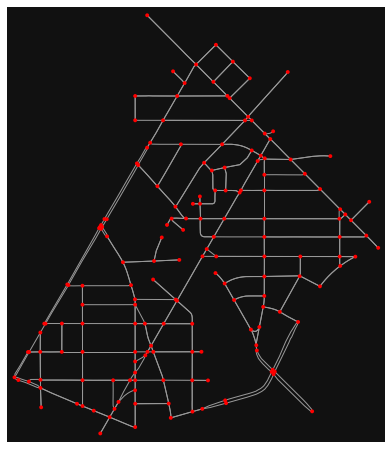

In [65]:
fig, ax = ox.plot_graph(G1, node_color="r")

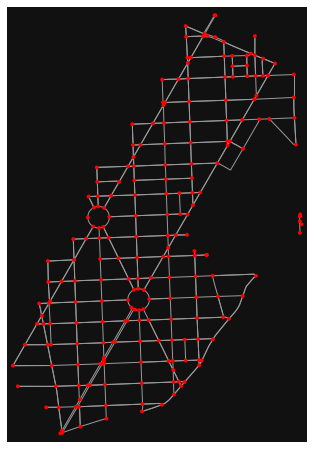

In [66]:
coords = my_map.iloc[2]
finalcoords = coords[2]

G2 = ox.graph_from_polygon(finalcoords, network_type="drive",
                            simplify=True, retain_all=True, truncate_by_edge=True, 
                            clean_periphery=True, custom_filter=None)
fig, ax = ox.plot_graph(G2, node_color="r")

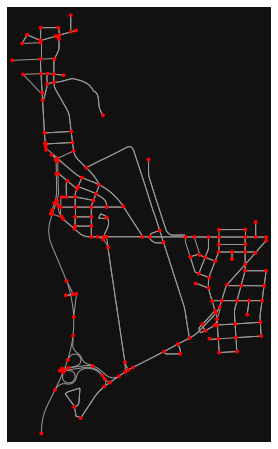

In [67]:
coords = my_map.iloc[3]
finalcoords = coords[2]

G3 = ox.graph_from_polygon(finalcoords, network_type="drive",
                            simplify=True, retain_all=True, truncate_by_edge=True, 
                            clean_periphery=True, custom_filter=None)
fig, ax = ox.plot_graph(G3, node_color="r")

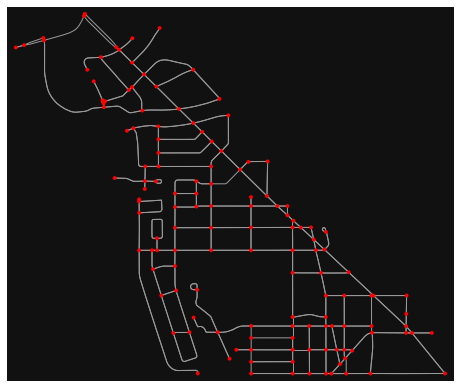

In [68]:
coords = my_map.iloc[4]
finalcoords = coords[2]

G4 = ox.graph_from_polygon(finalcoords, network_type="drive",
                            simplify=True, retain_all=True, truncate_by_edge=True, 
                            clean_periphery=True, custom_filter=None)
fig, ax = ox.plot_graph(G4, node_color="r")

In [69]:
G12 = nx.compose(G1, G2)

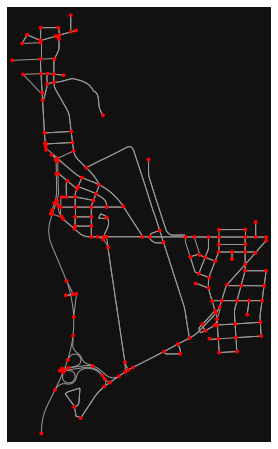

In [70]:
fig, ax = ox.plot_graph(G3, node_color="r")

In [71]:
G34 = nx.compose(G3, G4)

In [72]:
Gall = nx.compose(G12, G34)

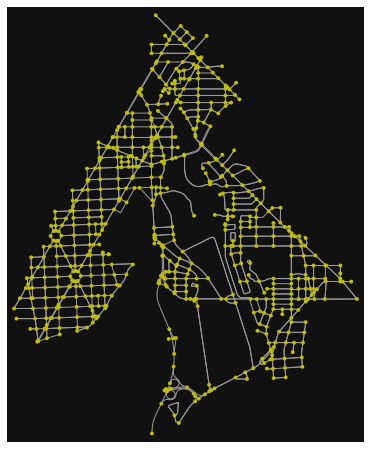

In [73]:
fig, ax = ox.plot_graph(Gall, node_color="y")

In [89]:
trip_times = [30, 45, 60, 75, 90, 105, 120]
travel_speed = 57

In [90]:
# find the centermost node and then project the graph to UTM
gdf_nodes = ox.graph_to_gdfs(Gall, edges=False)
x, y = 38.954015, -77.003331
center_node = ox.distance.nearest_nodes(Gall, x, y)
G = ox.project_graph(Gall)

In [91]:
for _, _, _, data in G.edges(data=True, keys=True):
    data["time"] = data["length"] / travel_speed

In [92]:
iso_colors = ox.plot.get_colors(n=len(trip_times), cmap="plasma", start=0, return_hex=True)

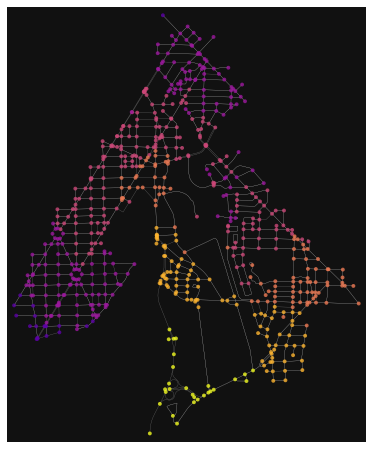

In [93]:
node_colors = {}
for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
    subgraph = nx.ego_graph(G, center_node, radius=trip_time, distance="time")
    for node in subgraph.nodes():
        node_colors[node] = color
nc = [node_colors[node] if node in node_colors else "none" for node in G.nodes()]
ns = [15 if node in node_colors else 0 for node in G.nodes()]
fig, ax = ox.plot_graph(
    G,
    node_color=nc,
    node_size=ns,
    node_alpha=0.8,
    edge_linewidth=0.2,
    edge_color="#999999",
)

In [94]:
isochrone_polys = []
for trip_time in sorted(trip_times, reverse=True):
    subgraph = nx.ego_graph(G, center_node, radius=trip_time, distance="time")
    node_points = [Point((data["x"], data["y"])) for node, data in subgraph.nodes(data=True)]
    bounding_poly = gpd.GeoSeries(node_points).unary_union.convex_hull
    isochrone_polys.append(bounding_poly)

In [95]:
from descartes import PolygonPatch
from shapely.geometry import LineString
from shapely.geometry import Point
from shapely.geometry import Polygon

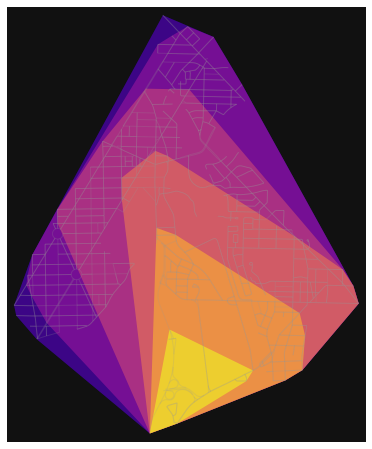

In [96]:
fig, ax = ox.plot_graph(
    G, show=False, close=False, edge_color="#999999", edge_alpha=0.2, node_size=0
)
for polygon, fc in zip(isochrone_polys, iso_colors):
    patch = PolygonPatch(polygon, fc=fc, ec="none", alpha=0.6, zorder=-1)
    ax.add_patch(patch)
plt.show()